# Lista 7, zad. 1
Igor Tryhub, 275235

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn import preprocessing
import math
from sklearn import datasets
import sklearn.datasets, sklearn.decomposition
from mpl_toolkits.mplot3d import Axes3D

a) Utwórz  zestaw  danych 
X
  składaj
ą
cy  si
ę
  z  1000  wektorów  dwuwymiarowych 
x
i
  =  (x
1i
, 
x
2i
)
T
,  dla  i  =  1,  2,  ...,  1000,  wygenerowanych  losowo  przy
  u
ż
yciu  dwuwymiarowego 
rozkładu normalnego o 
ś
redniej [3, 5]  i macierzy kowariancji [12, 3; 3, 1
]. 

In [2]:
n = 1000
mean = np.array([3,5])
cov = np.array([[12,3], [3,1]])
X = np.random.multivariate_normal(mean, cov, n).T
x, y = X

b) Ustandaryzuj dane, tak aby 
ś
rednia dla ka
ż
dego z wymiarów wynosiła 0, a wariancja 1. 
Ustandaryzowane dane oznaczmy przez 
X
(0)
. 

In [3]:
m = np.mean(X, axis=1)
s = np.std(X, axis=1)
X0 = (X - m.reshape(-1,1))/s.reshape(-1,1)
x0, y0 = X0

c) Policz macierz kowariancji 
S
 ustandaryzowanego zestawu danych 
X
(0)
. 

In [4]:
S = np.cov(X0)
S

array([[ 1.001001  ,  0.86784099],
       [ 0.86784099,  1.001001  ]])

d) Wyznacz  warto
ś
ci  własne 
λ
1
  i
 λ
2
  oraz  odpowiadaj
ą
ce  im  wektory  własne 
v
1
  i 
v
2
macierzy  kowariancji 
S
.  Dla  ustalenia  notacji,  warto
ś
ci  własne  porz
ą
dkujemy  malej
ą
co, 
tzn. 
λ
1
 >
 λ
2
. 

In [5]:
W,V = LA.eig(S)
print('Eigenvalues: \n{}'.format(W))
print('Eigenvectors: \n{}'.format(V))

Eigenvalues: 
[ 1.86884199  0.13316001]
Eigenvectors: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


e) Wyznacz  składowe  główne  zestawu  danych,  tzn.  dla
  ka
ż
dego  punktu  danych 
x
i
(0)
wyznacz  punkt 
y
i
  =  (1/sqrt(
λ
1
) 
v
1
T
  x
i
(0)
,  1/sqrt(
λ
2
) 
v
2
T
  x
i
(0)
)
T
.  Odpowiada  to  zrzutowaniu 
punktu 
x
i
(0)
  na  osie  nowego  układu  współrz
ę
dnych  wyznaczonego  przez  wektory  własne 
macierzy S i przeskalowaniu przez pierwiastki z war
to
ś
ci własnych. 

In [6]:
Y2 = V.T.dot(X0) 
Y = Y2 / np.sqrt(W).reshape(-1, 1)
xY,yY = Y

f) Zrób   rysunki   pokazuj
ą
ce   oryginalny   zbiór   danych   (punkty 
x
i
),   zbiór   danych   po 
standaryzacji  (punkty 
x
i
(0)
)  i  zbioru  danych  po  przekształceniu  PCA  (punkty 
y
i
).  Na 
rysunkach z punktami 
x
i
 i 
x
i
(0)
 narysuj proste zawieraj
ą
ce osie główne elipsy wyznaczanej 
przez punkty danych. 

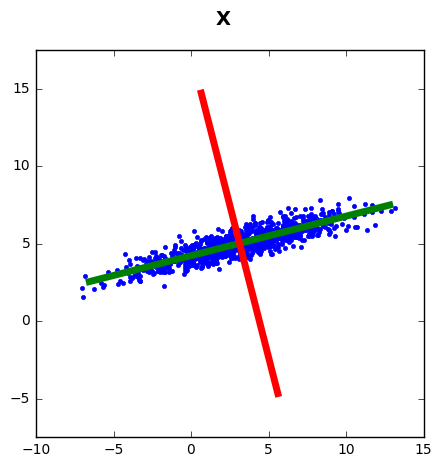

([array([-6.56270347,  5.59810296]), array([ 12.81716017,   0.65635373])],
 [array([ 2.55258173, -4.66647548]), array([  7.49433096,  14.71338816])])

In [7]:
plt.figure(figsize=(5,5))
plt.plot(x, y, '.')
plt.suptitle('X', fontsize=14, fontweight='bold')
_, xV = LA.eig(cov)
first_vector = xV[0]*10
second_vector = xV[1]*10
plt.plot([m[0]-first_vector, m[0]+first_vector], [m[1]-second_vector,m[1]+second_vector], linewidth=5.0)
plt.axis('equal')
plt.show()
[m[0]-first_vector, m[0]+first_vector], [m[1]-second_vector,m[1]+second_vector]

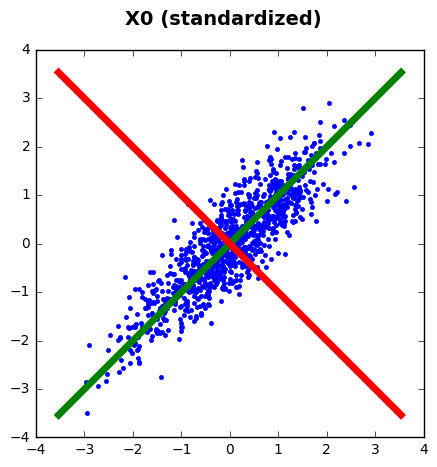

In [8]:
plt.figure(figsize=(5,5))
plt.plot(x0, y0, '.')
first_vector = V[0]*5
second_vector = V[1]*5
plt.suptitle('X0 (standardized)', fontsize=14, fontweight='bold')
plt.plot([-first_vector,+first_vector], [-second_vector,+second_vector], linewidth=5.0)
plt.axis('equal')
plt.show()

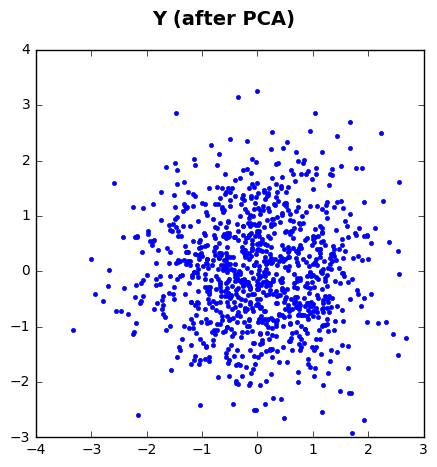

In [9]:
plt.figure(figsize=(5,5))
plt.plot(xY, yY, '.')
plt.suptitle('Y (after PCA)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

g) Sprawd
ź
   charakterystyk
ę
   statystyczn
ą
   (
ś
redni
ą
,   wariancj
ę
,   macierz   kowariancji   i 
macierz  korelacji)  oryginalnego  zbioru  danych,  zbio
ru  danych  po  standaryzacji  i  zbioru 
danych po przekształceniu PCA. 

In [10]:
def print_stats(data):
    mean = np.mean(data, 1)
    std = np.std(data, 1)
    cov = np.cov(data).T
    corr = np.corrcoef(data)
    print("Mean: \n{}".format(mean))
    print("Standard deviation: \n{}".format(std))
    print("Covariance: \n{}".format(cov))
    print("Correlation coefficients: \n{}".format(corr))

In [11]:
print("============ X ============")
print_stats(X)

============ X ============
Mean: 
[ 3.12722835  5.02345634]
Standard deviation: 
[ 3.43127064  0.9994758 ]
Covariance: 
[[ 11.78540361   2.97623635]
 [  2.97623635   0.99995183]]
Correlation coefficients: 
[[ 1.          0.86697315]
 [ 0.86697315  1.        ]]


In [12]:
print("============ X0 (standardized) ============")
print_stats(X0)

============ X0 (standardized) ============
Mean: 
[  6.66133815e-16   4.37574976e-15]
Standard deviation: 
[ 1.  1.]
Covariance: 
[[ 1.001001    0.86784099]
 [ 0.86784099  1.001001  ]]
Correlation coefficients: 
[[ 1.          0.86697315]
 [ 0.86697315  1.        ]]


In [13]:
print("============ Y (after PCA) ============")
print_stats(Y)

============ Y (after PCA) ============
Mean: 
[  2.59969823e-15   7.20845605e-15]
Standard deviation: 
[ 0.99949987  0.99949987]
Covariance: 
[[  1.00000000e+00   1.04909963e-16]
 [  1.04909963e-16   1.00000000e+00]]
Correlation coefficients: 
[[  1.00000000e+00   1.04909963e-16]
 [  1.04909963e-16   1.00000000e+00]]


h) Wyja
ś
nij  dlaczego  licz
ą
c  punkty 
y
i
  dzielimy  przez  pierwiastki  z  warto
ś
ci  własnych.  Jak 
wygl
ą
dałyby wyniki f) i g), gdyby
ś
my nie wykonywali tego dzielenia? 

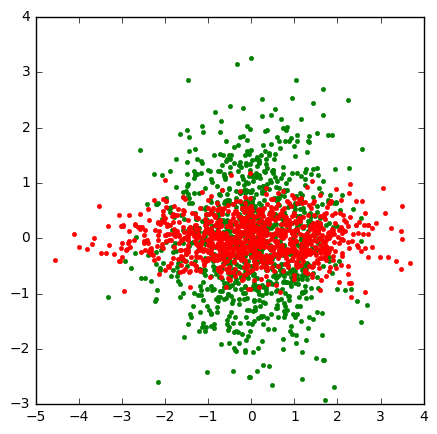

============ Y2 (not normalized Y) ============
Mean: 
[  3.55981911e-15   2.63078448e-15]
Standard deviation: 
[ 1.36637226  0.36472846]
Covariance: 
[[  1.86884199e+00   5.77893867e-17]
 [  5.77893867e-17   1.33160009e-01]]
Correlation coefficients: 
[[  1.00000000e+00   1.15844357e-16]
 [  1.15844357e-16   1.00000000e+00]]


In [14]:
plt.figure(figsize=(5,5))
plt.plot(xY, yY, '.g')
xY2, yY2 = Y2
plt.plot(xY2, yY2, '.r')
plt.show()

print("============ Y2 (not normalized Y) ============")
print_stats(Y2)

As we can observe from the graph above, if we hadn't divided X0 by the square roots of eigenvalues, our standard deviation and covariance wouldn't be normalized and hence the datapoints wouldn't be normally distributed.

i) Powtórz wszystkie powy
ż
sze obliczenia dla zestawu danych 
X
 składaj
ą
cego si
ę
 z 1000 
wektorów dwuwymiarowych 
x
i
 = (x
1i
, x
2i
)
T
, dla i = 1, 2, ..., 1000, wygenerowanych losowo 
przy u
ż
yciu mieszaniny trzech rozkładów normalnych o 
ś
rednich [-21, -2], [3, 5], [27, 12], 
macierzy  kowariancji  [12,  3;  3,  1]  takiej  samej  dla
  wszystkich  trzech  rozkładów  oraz  wag 
równych dla wszystkich trzech rozkładów wynosz
ą
cych 1/3

In [15]:
n = 1000
mean3 = np.array([[-21,-2], [3,5], [27,12]])
cov3 = np.array([[12,3], [3,1]])
X3 = np.zeros([2, n])
for i in range(1000):
    r = np.random.uniform()
    X3[:, i] = np.random.multivariate_normal(mean3[int(3*r)], cov3, 1)

j) Powtórz b), c), d) i e) dla zestawu danych IRIS.
 Zrób dwuwymiarowy rysunek ilustruj
ą
cy 
zbiór  danych  IRIS  wykre
ś
laj
ą
c  na  osi  x  pierwsz
ą
  składow
ą
  główn
ą
  y
1i
,  a  na  osi  y
2i
  drug
ą
składow
ą
 główn
ą
 ka
ż
dego punktu 
x
i
. 

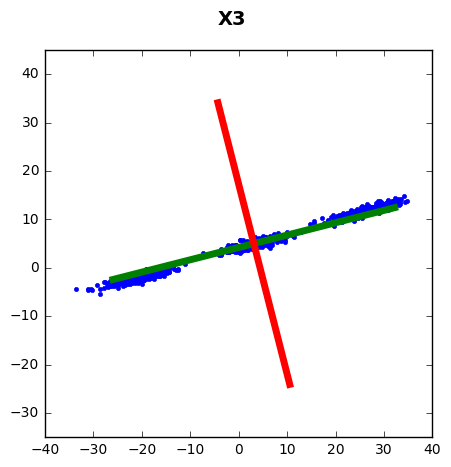

In [16]:
xX3, yX3 = X3
fig = plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xX3, yX3, '.')
plt.suptitle('X3', fontsize=14, fontweight='bold')

_, xV3 = LA.eig(cov3)
first_vector = xV3[0]*30
second_vector = xV3[1]*30
plt.plot([m[0]-first_vector, m[0]+first_vector], [m[1]-second_vector,m[1]+second_vector], linewidth=5.0)

plt.show()

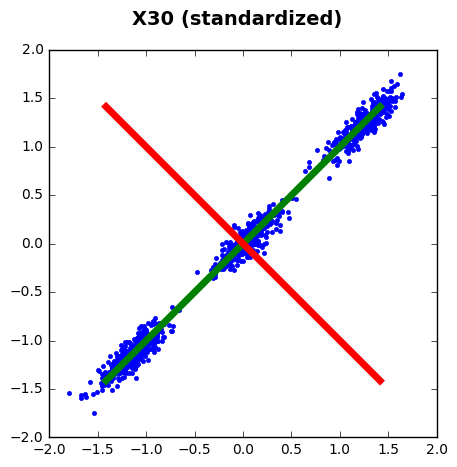

In [17]:
m = np.mean(X3, axis=1)
s = np.std(X3, axis=1)
X30 = (X3 - m.reshape(-1, 1)) / s.reshape(-1, 1)

xX30, yX30 = X30
fig = plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xX30, yX30, '.')
plt.suptitle('X30 (standardized)', fontsize=14, fontweight='bold')

_, xV3 = LA.eig(np.cov(X30))
first_vector = xV3[0]*2
second_vector = xV3[1]*2
plt.plot([-first_vector, +first_vector], [-second_vector,+second_vector], linewidth=5.0)

plt.show()

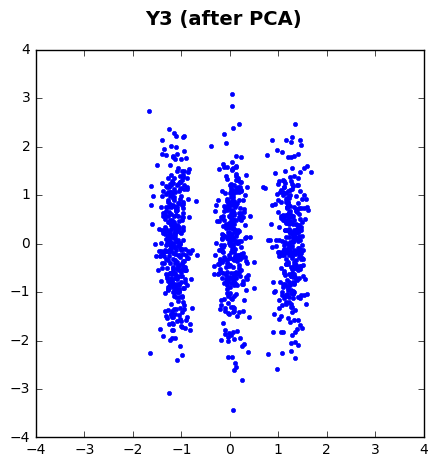

In [18]:
S3 = np.cov(X30)
W3,V3 = np.linalg.eig(S3)
Y32 = V3.T.dot(X30)
Y3 = Y32 / (np.sqrt(W3).reshape(-1, 1))

xY3, yY3 = Y3
fig = plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xY3, yY3, '.')
plt.suptitle('Y3 (after PCA)', fontsize=14, fontweight='bold')

plt.show()

In [19]:
print("============ X3 ============")
print_stats(X3)

============ X3 ============
Mean: 
[ 2.00444048  4.7179284 ]
Standard deviation: 
[ 19.86323336   5.81133497]
Covariance: 
[[ 394.94298238  115.06739431]
 [ 115.06739431   33.80541957]]
Correlation coefficients: 
[[ 1.          0.99584538]
 [ 0.99584538  1.        ]]


In [20]:
print("============ X30 ============")
print_stats(X30)

============ X30 ============
Mean: 
[ -4.26325641e-17  -4.88498131e-17]
Standard deviation: 
[ 1.  1.]
Covariance: 
[[ 1.001001    0.99684222]
 [ 0.99684222  1.001001  ]]
Correlation coefficients: 
[[ 1.          0.99584538]
 [ 0.99584538  1.        ]]


In [21]:
print("============ Y3 ============")
print_stats(Y3)

============ Y3 ============
Mean: 
[ -5.32907052e-17  -1.16351373e-16]
Standard deviation: 
[ 0.99949987  0.99949987]
Covariance: 
[[  1.00000000e+00   2.00662532e-15]
 [  2.00662532e-15   1.00000000e+00]]
Correlation coefficients: 
[[  1.00000000e+00   2.00662532e-15]
 [  2.00662532e-15   1.00000000e+00]]


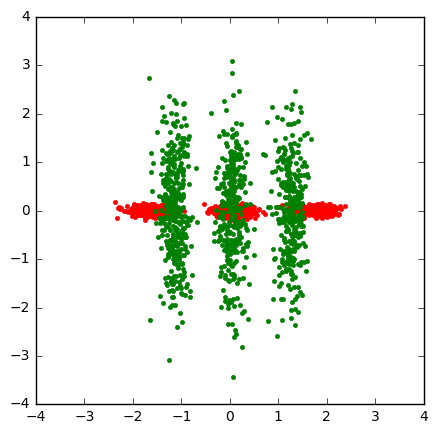

============ Y32 (not normalized Y) ============
Mean: 
[  3.55981911e-15   2.63078448e-15]
Standard deviation: 
[ 1.36637226  0.36472846]
Covariance: 
[[  1.86884199e+00   5.77893867e-17]
 [  5.77893867e-17   1.33160009e-01]]
Correlation coefficients: 
[[  1.00000000e+00   1.15844357e-16]
 [  1.15844357e-16   1.00000000e+00]]


In [22]:
xY32, yY32 = Y32
fig = plt.figure(figsize=(5,5))
plt.axis('equal')
plt.plot(xY32, yY32, '.r')
plt.plot(xY3, yY3, '.g')

plt.show()

print("============ Y32 (not normalized Y) ============")
print_stats(Y2)

k) Dla  zestawu  danych  IRIS,  spróbuj  odtworzy
ć
  oryginalne  punkty  danych 
x
i
  z  danych 
zredukowanych  do  dwóch  składowych  głównych,  tzn.  z 
dwuwymiarowych  punktów  [y
1i
, 
y
2i
]
T
. Policz 
ś
redniokwadratowy bł
ą
d odtworzenia, tzn. sum
ę
 kwadratów odległo
ś
ci mi
ę
dzy 
oryginalnym punktem danych a odtworzonym punktem da
nych. 

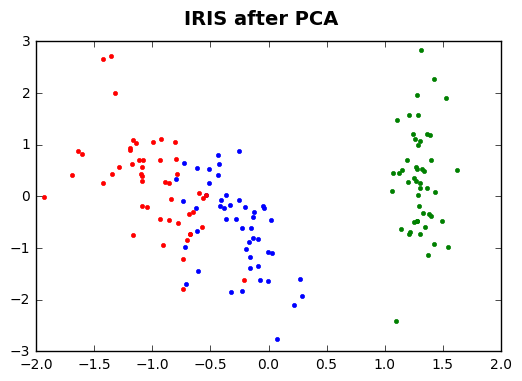

In [23]:
iris = datasets.load_iris() 
data  = np.array(iris.data)
X = data.T

m = np.mean(X, axis=1)
s = np.std(X, axis=1)
X0 = (X - m.reshape(-1, 1)) / s.reshape(-1, 1)
S = np.cov(X0)
W,V = np.linalg.eigh(S)
Y = V.T.dot(X0) / (np.sqrt(W).reshape(-1, 1))

_, _, y, x = Y
plt.plot(x[:50], y[:50], 'g.')
plt.plot(x[51:100], y[51:100], 'b.')
plt.plot(x[101:150], y[101:150], 'r.')
plt.suptitle('IRIS after PCA', fontsize=14, fontweight='bold')
plt.show()

In [24]:
X = sklearn.datasets.load_iris().data
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

Xhat = np.dot(pca.transform(X)[:,:2], pca.components_[:2,:])
Xhat += mu

s = np.square(X-Xhat).sum()
print("Mean Squared Error: {}".format(s))

Mean Squared Error: 15.228833347803326


l) Jakie znaczenie ma suma warto
ś
ci własnych macierzy kowariancji 
S
, które zostały u
ż
yte 
do konstrukcji danych zredukowanych? 

PCA computes eigenvectors of the covariance matrix and sorts them by their eigenvalues, which are the amount of explained variance. The bigger the sum of eigenvalues used in PCA, the lower loss of original data occures after dimensionality reduction.